In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import seaborn as sns
import networkx as nx
from networkx.algorithms import approximation as nx_approx


# Adding path to module
sys.path.append("../")
# picture path
PICS = '../pics/'

# Module imports
from contagion import Contagion, config
from contagion.config import _baseconfig
from contagion.plotting import plot_infection_history

In [2]:
my_config = dict(_baseconfig)
my_config["general"]["random state seed"] = 3
my_config["general"]["track graph history"] = True
my_config["general"]["debug level"] = 50
my_config["population"]["population class"] = "NetworkXPopulation"
my_config["population"]["store population"] = True
my_config["population"]["re-use population"] = False
my_config["scenario"]["sim_length"] = 1000
my_config['infection']['infected'] = 10
my_config['infection']["hospitalization probability pdf"]['mean'] = 0.0001
my_config['infection']["hospitalization probability pdf"]['sd'] = 0.00001
my_config['infection']['will have symptoms prob pdf']['mean'] = 0.5
my_config['infection']['will have symptoms prob pdf']['sd'] = 0.1
my_config["population"]["random interactions pdf"]["mean"] = 0.001
my_config["population"]["random interactions pdf"]["sd"] = 0.001
my_config["population"]["random interactions intensity pdf"]["mean"] = 0.0001
my_config["population"]["random interactions intensity pdf"]["sd"] = 0.0001

my_config["population"]["population size"] = 10000
my_config["population"]["nx"] = {
            "func": "lfr_benchmark",
            "kwargs": {
                "tau1": 3.5,
                "tau2": 1.1,
                "mu": 0.2,
                "average_degree": 5,
                "min_community": 9,
                "max_iters": 1000,
            },
            "inter freq pdf": {
                "class": "Gamma",
                "mean": 7.8,
                "sd": 3
            },
            "intra freq pdf": {
                "class": "Gamma",
                "mean": 7.8,
                "sd": 3
            }

        }


In [3]:
my_config["population"]["nx"]["func"] = "lfr_benchmark"
my_config["population"]["nx"]["kwargs"] = {
                "tau1": 3.5,
                "tau2": 1.1,
                "mu": 0.2,
                "average_degree": 5,
                "min_community": 9,
                "max_iters": 1000,
            }
results = []
for i in range(10):
    my_config["general"]["random state seed"] =  i
    contagion = Contagion(my_config)
    g = contagion.pop._graph
    contagion.sim()
    results.append((pd.DataFrame(contagion.statistics), g))
    rate_per_node = []
    for node in g:
        rate_per_node.append(sum([val["weight"] for _, val in dict(g[node]).items()]))

    print(np.average(rate_per_node))
    contagion.sim()
    stats = pd.DataFrame(contagion.statistics)

7.79366124878986


KeyboardInterrupt: 

Text(0, 0.5, 'Infected')

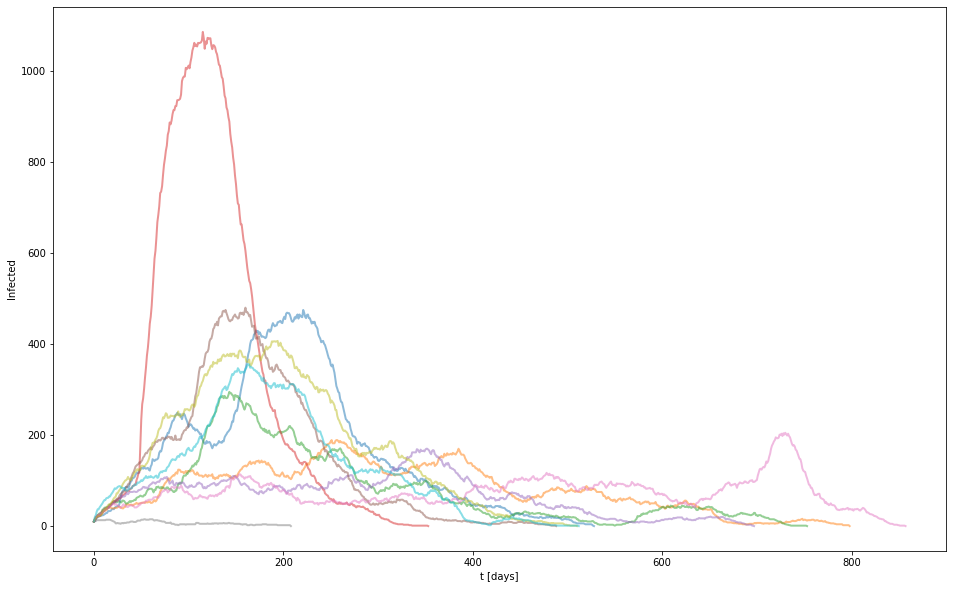

In [60]:
fig, axs = plt.subplots(figsize=(16, 10))
ax = axs
for res, _ in results:
    ax.plot(np.arange(len(res['is_infected'])), res['is_infected'],
            lw=2, alpha=0.5)
ax.set_xlabel("t [days]")
ax.set_ylabel("Infected")

In [5]:
my_config["general"]["random state seed"] =  0
my_config["population"]["nx"]["func"] = "lfr_ba"
my_config["population"]["nx"]["kwargs"] = {
                "m": 4,
                "tau": 1.2,
                "mu": 0.5,
                "min_community": 10,
                "max_community": 500,
                "max_iters": 2000,
                "tolerance": 0.1
            }
results = []
contagion = Contagion(my_config)
contagion.sim()
stats = pd.DataFrame(contagion.statistics)
g = contagion.pop._graph

7.799306761283627
7.803129136321263


(0, 50)

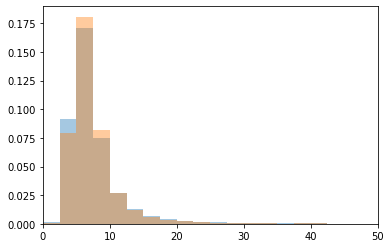

In [10]:
my_config["population"]["nx"]["kwargs"]["m"] = 3
contagion = Contagion(my_config)
g = contagion.pop._graph
rate_per_node = []
for node in g:
    rate_per_node.append(sum([val["weight"] for _, val in dict(g[node]).items()]))

print(np.average(rate_per_node))
sns.distplot(rate_per_node, bins=np.arange(100, step=10/4), kde=False, norm_hist=True)
my_config["population"]["nx"]["kwargs"]["m"] = 5
contagion = Contagion(my_config)
g = contagion.pop._graph
rate_per_node = []
for node in g:
    rate_per_node.append(sum([val["weight"] for _, val in dict(g[node]).items()]))

print(np.average(rate_per_node))
sns.distplot(rate_per_node, bins=np.arange(100, step=10/4), kde=False, norm_hist=True)
plt.xlim(0, 50)

7.78946129114369
7.78946129114369


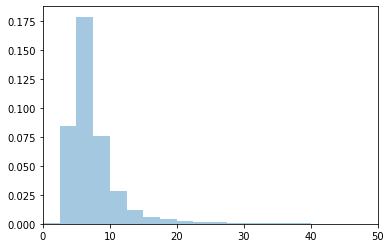

In [6]:
rate_per_node = []
for node in g:
    rate_per_node.append(sum([val["weight"] for _, val in dict(g[node]).items()]))

print(np.average(rate_per_node))
sns.distplot(rate_per_node, bins=np.arange(100, step=10/4), kde=False, norm_hist=True)
plt.xlim(0, 50)

print(np.average(rate_per_node))

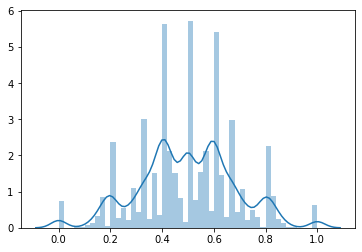

In [33]:
fig, ax = plt.subplots()
mus = []
for node in g:
    inter = 0
    for adj in g[node]:
        if adj not in g.nodes[node]["community"]:
            inter += 1
    mus.append(inter / g.degree(node))
sns.distplot(mus, ax=ax)

In [ ]:
for i in range(10):
    my_config["general"]["random state seed"] =  i
    contagion = Contagion(my_config)
    g = contagion.pop._graph
    contagion.sim()
    results.append((pd.DataFrame(contagion.statistics), g))
   
    

Text(0, 0.5, 'Infected')

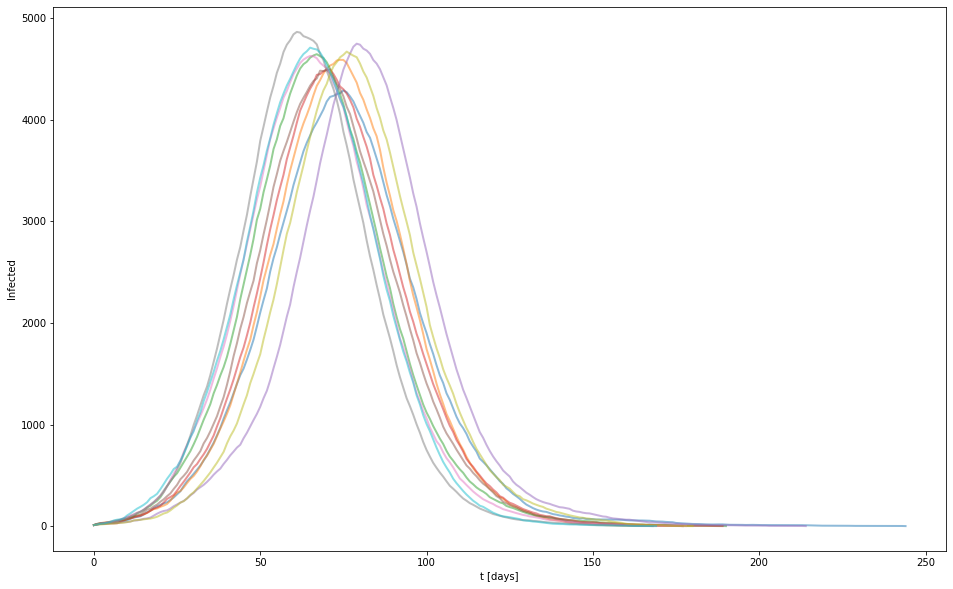

In [23]:
fig, axs = plt.subplots(figsize=(16, 10))
ax = axs
for res, _ in results:
    ax.plot(np.arange(len(res['is_infected'])), res['is_infected'],
            lw=2, alpha=0.5)
ax.set_xlabel("t [days]")
ax.set_ylabel("Infected")

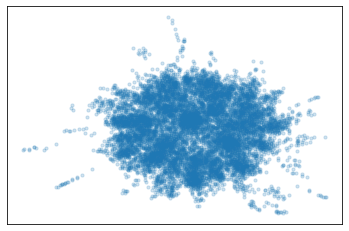

In [13]:
pos = nx.spring_layout(g, k=3/np.sqrt(g.number_of_nodes()))
nx.draw_networkx_nodes(g, pos, node_size=10, alpha=0.2)    

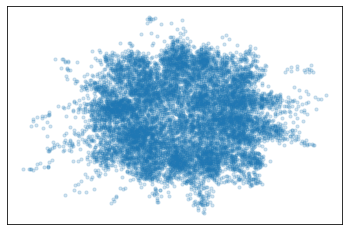

In [5]:
pos = nx.spring_layout(g, k=4/np.sqrt(g.number_of_nodes()))
nx.draw_networkx_nodes(g, pos, node_size=10, alpha=0.2)    

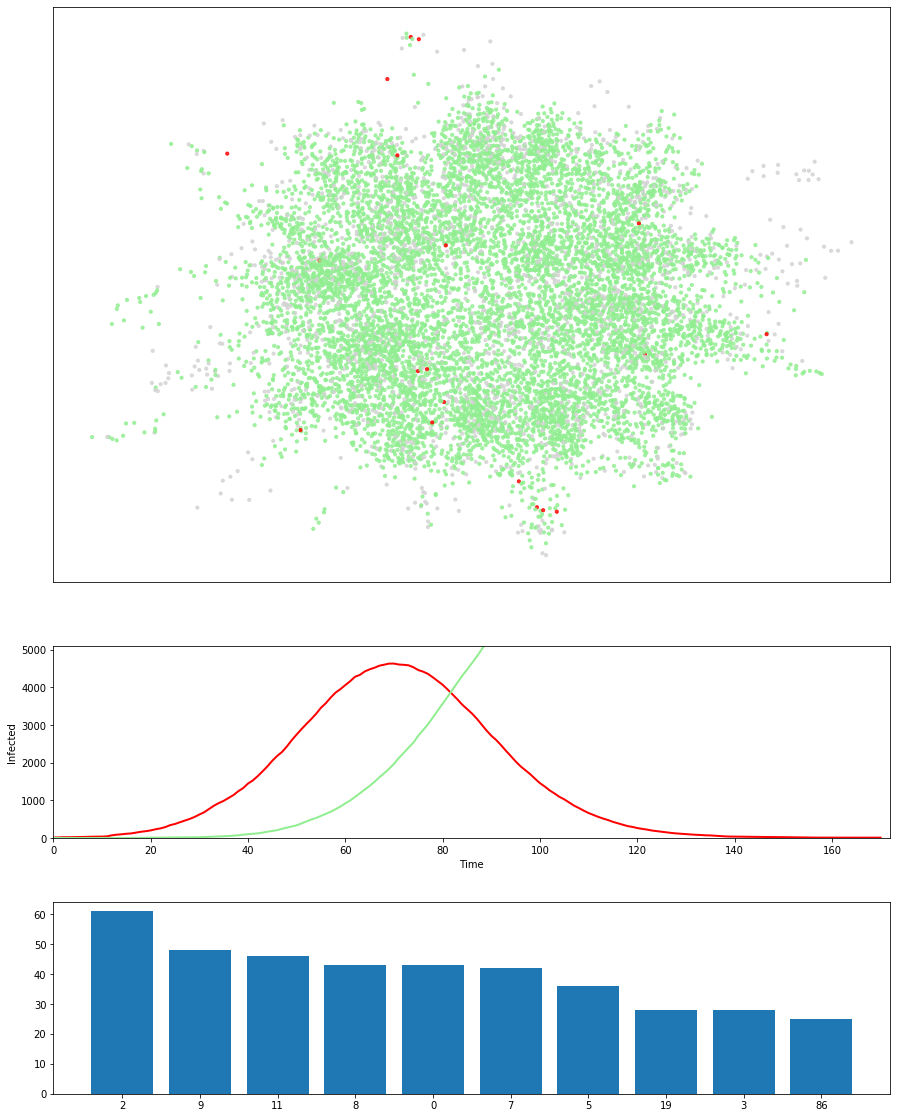

In [6]:
plot_infection_history(g, pos, stats, PICS+"lfr_ba_graph_animation.mp4")

In [ ]:
print(nx.transitivity(g))
comps = [g.subgraph(c).copy() for c in nx.connected_components(test_g)]
avg_pl = np.average([nx.average_shortest_path_length(comps) for comp in comps])
print(avg_pl)
#cc = nx.closeness_centrality(g)
#avg_cc = 
#print(avg_cc)


#print(avg_pl)

In [56]:
avg_cc = np.ma.average(np.ma.masked_invalid(1/np.asarray(list(cc.values()))))


In [30]:
def calc_k_freq(g, min_dens=0.95):
    k_comp = nx_approx.kcomponents.k_components(g, min_density=min_dens)
    k_sets = [set() for _ in k_comp]

    for (k, klist), ks in zip(k_comp.items(), k_sets):
        for k_set in klist:
            ks |= k_set
    k_hist = [len(k_set) for k_set in k_sets]
    return k_hist, k_comp

In [32]:
k_hist, k_comp = calc_k_freq(g)

KeyboardInterrupt: 

In [ ]:
k_hist

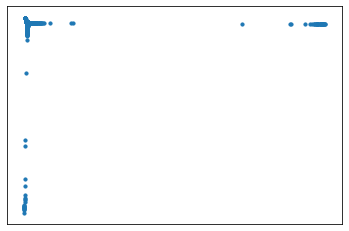

In [53]:
pos = nx.spectral_layout(g)
nx.draw_networkx_nodes(g, pos, node_size=10)    

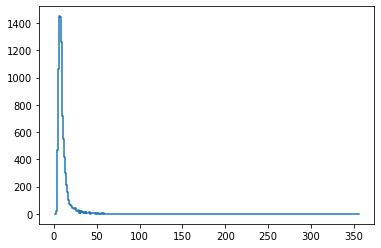

In [9]:
deg_hist = nx.degree_histogram(g)
plt.step(np.arange(1, len(deg_hist)+2), np.append(deg_hist, [deg_hist[-1]]))